In [361]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [362]:
# Reading the csv file.

df0=pd.read_csv('processed.cleveland.data', names=("age", "sex", "cp", "trestbps", "chol","fbs", "restecg",
                   "thalach","exang", "oldpeak","slope", "ca", "thal", "num"))
df0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [363]:
# Checking which all columns have null values
df0.isnull().sum().sort_values(ascending=False)

num         0
thal        0
ca          0
slope       0
oldpeak     0
exang       0
thalach     0
restecg     0
fbs         0
chol        0
trestbps    0
cp          0
sex         0
age         0
dtype: int64

In [364]:
# checking colulmn datatypes
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [365]:
# In the dataset there are ? values in most of the records under columns slop, ca & thal.
# Replacing the value ? with 0

df =df0.replace(to_replace ="?",value ="0") 
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [366]:
# Changing the data types from object type to float type for ca and thal columns for better analysis.

df[['ca', 'thal']] = df[['ca', 'thal']].apply(pd.to_numeric) 
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [367]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

num         0
thal        0
ca          0
slope       0
oldpeak     0
exang       0
thalach     0
restecg     0
fbs         0
chol        0
trestbps    0
cp          0
sex         0
age         0
dtype: int64

In [368]:
df.shape

(303, 14)

In [369]:
# Checking the zscore in order to normalize the data.
from scipy.stats import zscore

z= np.abs(zscore(df))
z

array([[0.94872647, 0.68620244, 2.25177456, ..., 0.71113139, 0.65913253,
        0.76419779],
       [1.39200191, 0.68620244, 0.87798549, ..., 2.5048807 , 0.86542592,
        0.86644961],
       [1.39200191, 0.68620244, 0.87798549, ..., 1.43287667, 1.16731868,
        0.05112591],
       ...,
       [0.28381332, 0.68620244, 0.87798549, ..., 0.36087264, 1.16731868,
        1.68177331],
       [0.28381332, 1.4572959 , 1.20852121, ..., 0.36087264, 0.86542592,
        0.05112591],
       [1.82174501, 0.68620244, 0.16526786, ..., 0.71113139, 0.86542592,
        0.76419779]])

In [370]:
# Verifying for the presence of zscore value of data with threshold of more than 3 std score.
threshold=3
print(np.where(z>3))

(array([ 48,  91, 121, 123, 126, 152, 181, 188, 245], dtype=int64), array([4, 9, 4, 9, 3, 4, 4, 3, 7], dtype=int64))


In [371]:
# Removing the outliers having zscore value of more than 3.
df_new=df[(z<3).all(axis=1)]
df_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Removed 9 records from the original data set where zscore was more than 3 and created as new set.

In [372]:
# Checking for skewness.
df_new.skew()

age        -0.179588
sex        -0.828274
cp         -0.824993
trestbps    0.524793
chol        0.260405
fbs         2.012412
restecg     0.054718
thalach    -0.480275
exang       0.743629
oldpeak     1.012591
slope       0.506177
ca          1.246304
thal        0.227140
num         1.113818
dtype: float64

In [373]:
# Normalizing skewness for fbs, ca and num
from scipy.stats import boxcox
from scipy.special import boxcox1p
# 0 -> log transform
# .5 -> square root transform

df_new['fbs']=boxcox1p(df_new['fbs'],0)
df_new['ca']=boxcox1p(df_new['ca'],0)
df_new['oldpeak']=boxcox1p(df_new['oldpeak'],0)

From the above graph trestbps & oldpeak have outliers.

In [374]:
df_new.skew()

age        -0.179588
sex        -0.828274
cp         -0.824993
trestbps    0.524793
chol        0.260405
fbs         2.012412
restecg     0.054718
thalach    -0.480275
exang       0.743629
oldpeak     0.360728
slope       0.506177
ca          0.802482
thal        0.227140
num         1.113818
dtype: float64

In [375]:
# Checking unique values for goals.
df_new['num'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

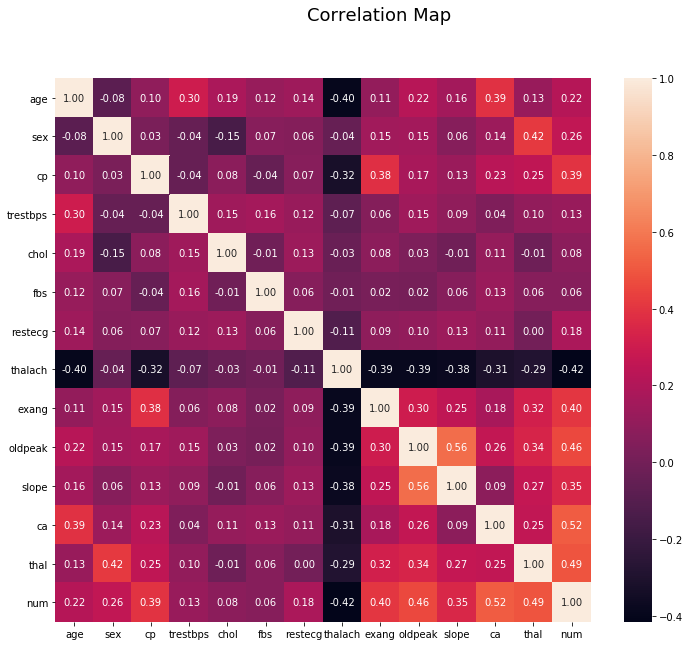

In [376]:
# Checking the correlation

plt.figure(figsize=(12,10)) 
sns.heatmap(df_new.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

1. Num which is related to presence of heart disease in patient is highly correlated with ca.
2. Second contributor to the disease is thal.


Text(0, 0.5, 'num')

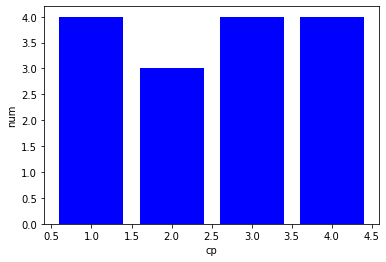

In [377]:
# Checking the relation between the cp & num

plt.bar(df_new['cp'], df_new['num'], color='b')
plt.xlabel('cp')
plt.ylabel('num')

Text(0, 0.5, 'num')

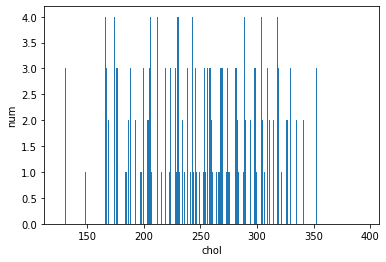

In [378]:
# Checking the relation between the Goal & Sex

plt.bar(df_new['chol'], df_new['num'])
plt.xlabel('chol')
plt.ylabel('num')

In [379]:
# Setting x  by excluding num column which the predictor variable 'y'.
x=df_new.drop(['num'],axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,0.693147,2.0,150.0,0.0,1.193922,3.0,0.000000,6.0
1,67.0,1.0,4.0,160.0,286.0,0.000000,2.0,108.0,1.0,0.916291,2.0,1.386294,3.0
2,67.0,1.0,4.0,120.0,229.0,0.000000,2.0,129.0,1.0,1.280934,2.0,1.098612,7.0
3,37.0,1.0,3.0,130.0,250.0,0.000000,0.0,187.0,0.0,1.504077,3.0,0.000000,3.0
4,41.0,0.0,2.0,130.0,204.0,0.000000,2.0,172.0,0.0,0.875469,1.0,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.000000,0.0,132.0,0.0,0.788457,2.0,0.000000,7.0
299,68.0,1.0,4.0,144.0,193.0,0.693147,0.0,141.0,0.0,1.481605,2.0,1.098612,7.0
300,57.0,1.0,4.0,130.0,131.0,0.000000,0.0,115.0,1.0,0.788457,2.0,0.693147,7.0
301,57.0,0.0,2.0,130.0,236.0,0.000000,2.0,174.0,0.0,0.000000,2.0,0.693147,3.0


In [380]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

scale = StandardScaler()
x=scale.fit_transform(x)

In [381]:
# Settting y axis as num column for heart disease prediction
y=df_new['num']
y

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 294, dtype: int64

In [382]:
max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    accuracyScore=accuracy_score(test_y,pred)
    #print("Accuracy_Score corresponding to r_state: ",r_state," is ",accuracyScore)
    if(accuracyScore>max_acc_score):
        max_acc_score=accuracyScore
        final_rstate=r_state
        
print("\n\n")
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_acc_score)




Max_accuracy_Score corresponding to final_r_state:  81  is  0.6891891891891891


In [383]:
# Setting the test x & y values and using the random state from above step which is 81.

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=81)

In [384]:
train_x.shape

(220, 13)

In [385]:
train_y.shape

(220,)

In [386]:
test_x.shape

(74, 13)

In [387]:
test_y.shape

(74,)

In [388]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [389]:
KNN=KNeighborsClassifier(n_neighbors=10)
SV=SVC(kernel="rbf")
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini')
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=100)
ADC=AdaBoostClassifier(n_estimators=100,random_state=100)
GBC=GradientBoostingClassifier(n_estimators=100,random_state=100)

In [390]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('AdaBoostClassifier',ADC))
models.append(('GradientBoostingClassifier',GBC))

In [391]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [392]:
Model=[]
score=[]
cvs=[]
rocscore=[]

for name,model in models:
    print("--------------",name,"--------------")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    AS=accuracy_score(test_y,pre)
    print("Accuracy Score: ", AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross_Val_Score: ", sc)
    cvs.append(sc*100)
    cm=confusion_matrix(test_y,pre)
    print(cm)
    print("\n")

-------------- KNeighborsClassifier --------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
Accuracy Score:  0.7027027027027027
Cross_Val_Score:  0.5847126436781609
[[43  2  0  0  0]
 [ 4  6  0  2  0]
 [ 1  5  2  1  0]
 [ 1  2  1  1  0]
 [ 1  2  0  0  0]]


-------------- SVC --------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Score:  0.6621621621621622
Cross_Val_Score:  0.571264367816092
[[44  1  0  0  0]
 [ 5  3  0  4  0]
 [ 1  5  2  1  0]
 [ 1  2  2  0  0]
 [ 1  1  0  1  0]]


-------------- LogisticRegression --------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   i

In [393]:
result=pd.DataFrame({"Model": Model, "Score": score})
result

,Model,Score
0,KNeighborsClassifier,70.270270
1,SVC,66.216216
2,LogisticRegression,68.918919
3,DecisionTreeClassifier,51.351351
4,GaussianNB,45.945946
5,RandomForestClassifier,62.162162
6,AdaBoostClassifier,60.810811
7,GradientBoostingClassifier,56.756757


# KNeighborsClassifier Model has better accuracy with 70%

In [394]:
# Saving the prediction data in a file.

predictData=pd.DataFrame(pre)
df.to_csv('HeartDisease_Predict.csv')
predictData

,0
0,2
1,3
2,0
3,2
4,0
...,...
69,0
70,0
71,3
72,2


In [395]:
# Saving the model

from sklearn.externals import joblib
joblib.dump(KNN,"KNN_HeartDisease.pkl")

['KNN_HeartDisease.pkl']